In [3]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The general functional dependence of a signal vs. pH can be expressed as follows.

$$
\begin{equation}
\label{ee}
S = \frac{S_B + S_A 10^{pK_a - pH}}{1 + 10^{pK_a - pH}}
\end{equation}
$$

In [2]:
def S(pH, pK, SA, SB):
    return ((SA + SB * 10 ** (pK -pH)) / (1 + 10 ** (pK -pH)))

If we consider 2 signals S1 and S2:

$$
\begin{align}
E \equiv 10^{pK_a - pH} &&
A1 \equiv S_A^1 &&
A2 \equiv S_A^2 \\
&& 
B1 \equiv S_B^1 &&
B2 \equiv S_B^2 \\
\end{align}
$$

It is always possible to build an isosbestic signal:

$$
(B1 - A1) (S2 - A2 + 1) - (B2- A2) (S1 - A1 + 1)
$$

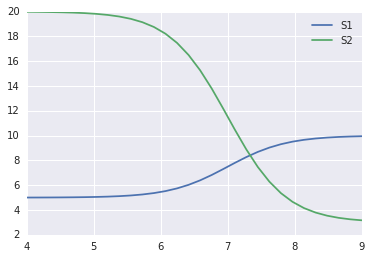

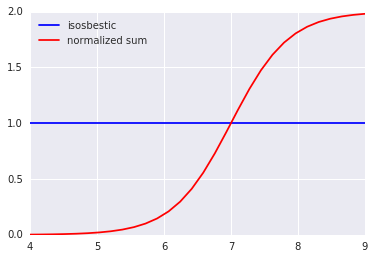

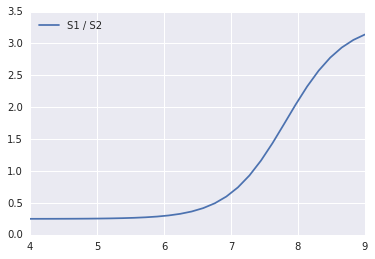

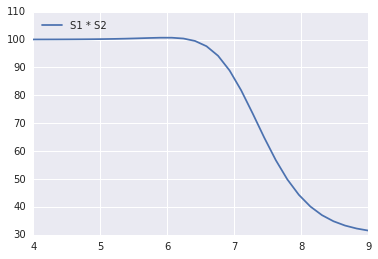

In [3]:
pK = 7
ph = np.linspace(4,9,30)

def iso(a1, a2, b1, b2):
    s1 = S(ph, pK, b1, a1)
    s2 = S(ph, pK, b2, a2)
    plt.plot(ph, s1)
    plt.plot(ph, s2)
    plt.legend(['S1','S2'])
    plt.figure()
    iso = (b1 - a1) * (s2 - a2 + 1) - (b2 - a2) * (s1 - a1 + 1)
    iso = abs(iso)/iso.max()
    norm_sum = (s1 - a1) / (b1 - a1) + (s2 - a2) / (b2 - a2)
    plt.plot(ph, iso, 'b')
    plt.plot(ph, norm_sum, 'r')
    plt.legend(['isosbestic', 'normalized sum'], loc=2)
    plt.figure()
    plt.plot(ph, s1 / s2)
    plt.legend(['S1 / S2'], loc=2)
    plt.figure()
    plt.plot(ph, s1 * s2)
    plt.legend(['S1 * S2'], loc=2)
    


iso(5, 20, 10, 3)

In [4]:
n = np.random.poisson(19, size=10)
d = np.random.poisson(9, size=10)
n/d, 19/9, np.exp(np.log(n) - np.log(d))

(array([ 1.85714286,  2.11111111,  1.875     ,  1.77777778,  2.42857143,
         2.3       ,  1.54545455,  2.18181818,  1.61538462,  1.41666667]),
 2.111111111111111,
 array([ 1.85714286,  2.11111111,  1.875     ,  1.77777778,  2.42857143,
         2.3       ,  1.54545455,  2.18181818,  1.61538462,  1.41666667]))